# Analyze EMG Data

In [41]:
from datetime import datetime
from collections import defaultdict

import pandas as pd

from putemg_download import download, get_records_dataframe 

## 

In [14]:
records_df = get_records_dataframe(experiment_types=["emg_gestures"], media_types=["data-hdf5"])
records_df

,type,id,trajectory,date,time
0,emg_gestures,03,repeats_long,2018-05-11,11-05-00-695
1,emg_gestures,03,sequential,2018-05-11,11-10-50-475
2,emg_gestures,03,repeats_short,2018-05-11,11-15-21-403
3,emg_gestures,03,repeats_long,2018-06-14,12-32-53-659
4,emg_gestures,03,sequential,2018-06-14,12-38-43-358
...,...,...,...,...,...
259,emg_gestures,54,sequential,2018-04-27,14-07-07-181
260,emg_gestures,54,repeats_short,2018-04-27,14-14-48-078
261,emg_gestures,54,repeats_long,2018-05-11,13-55-15-089
262,emg_gestures,54,sequential,2018-05-11,14-01-02-850


In [15]:
# create a DataFrame defaultdict
date_buckets = defaultdict(pd.DataFrame)

# get unique dates
dates = records_df.date.unique()

# iterate through dates and add data to the date_buckets
for key in dates:
    date_buckets[key] = records_df[:][records_df.date == key]

In [49]:
print(f"Number of days: {len(date_buckets.keys())}")

Number of days: 27


<AxesSubplot:xlabel='date'>

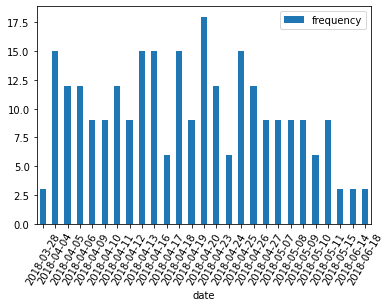

In [46]:
date_distribution = sorted([(k, len(v)) for k, v in date_buckets.items()])
date_distribution_df = pd.DataFrame(date_distribution, columns=['date', 'frequency'])
date_distribution_df.plot.bar(x='date', y='frequency', rot=60)

In [10]:
# records_df.plot.bar(x='date', y='id', rot=0)
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df
# ax = df.plot.bar(x='lab', y='val', rot=0)

,lab,val
0,A,10
1,B,30
2,C,20


In [17]:
date_buckets[dates[0]].plot.bar(x='lab', y='val', rot=0)


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

## Download Data

In [2]:
await download(experiment_types=["emg_gestures"], media_types=["data-hdf5"])

{'emg_gestures'}
{'data-hdf5'}
['03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31', '33', '34', '35', '36', '38', '39', '42', '43', '45', '46', '47', '48', '49', '50', '51', '53', '54']
Fetching Data-HDF5/emg_gestures-03-repeats_long-2018-05-11-11-05-00-695.hdf5
Fetching Data-HDF5/emg_gestures-03-repeats_long-2018-06-14-12-32-53-659.hdf5
Fetching Data-HDF5/emg_gestures-03-sequential-2018-06-14-12-38-43-358.hdf5
Fetching Data-HDF5/emg_gestures-04-repeats_long-2018-03-28-12-38-01-391.hdf5
Fetching Data-HDF5/emg_gestures-04-repeats_long-2018-06-18-15-02-12-970.hdf5
Fetching Data-HDF5/emg_gestures-05-repeats_long-2018-04-23-08-25-01-289.hdf5
Fetching Data-HDF5/emg_gestures-06-repeats_long-2018-04-16-08-36-26-469.hdf5
Fetching Data-HDF5/emg_gestures-06-repeats_short-2018-04-16-08-46-42-440.hdf5
Fetching Data-HDF5/emg_gestures-07-repeats_long-2018-04-04-11-42-19-070.hdf5
Fetching Dat

ClientPayloadError: Response payload is not completed